## Bitcoin-Price-forecasting-Model

In [23]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [24]:
#let's read in our bitcoin data and parse the dates
df = pd.read_csv("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) #parse the date column and tell pandas column 1 is datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past 8 years but there are only 2787 samples.

Typically deep learning models usually have large sample size ranging from 100 thousands to millions.

The Seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [26]:
# only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
...,...
2021-05-14,49764.13208
2021-05-15,50032.69314
2021-05-16,47885.62525


In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price of Bitcoin from 1 oct 2013 to 18 May 2021')

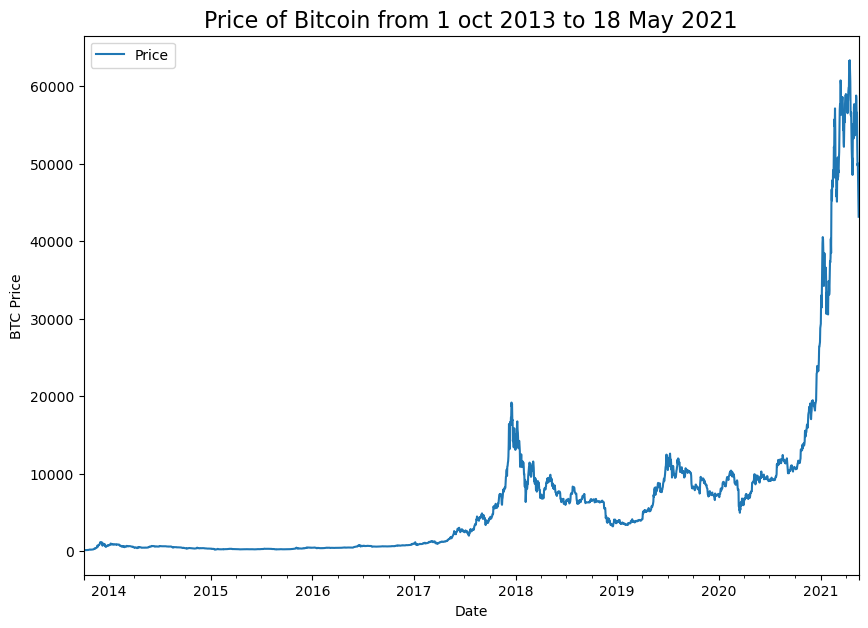

In [28]:
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 May 2021", fontsize = 16)

In [29]:
bitcoin_prices.describe()

,Price
count,2787.000000
mean,6529.845141
std,10887.847444
min,108.584830
25%,460.087500
50%,2780.182500
75%,8506.923720
max,63346.789040


Dataset doesn't have any missing values or other issues we can go ahead with model building.

#### Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10],  prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [32]:
# create train and test splits the right way for the time series data
split_size = int(0.8*len(prices)) #80%train 20% test

#create train data splits (everything before the split)
x_train, y_train = timesteps[:split_size], prices[:split_size]

#create test data splits (everything  beyond the split)
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(2229, 2229, 558, 558)

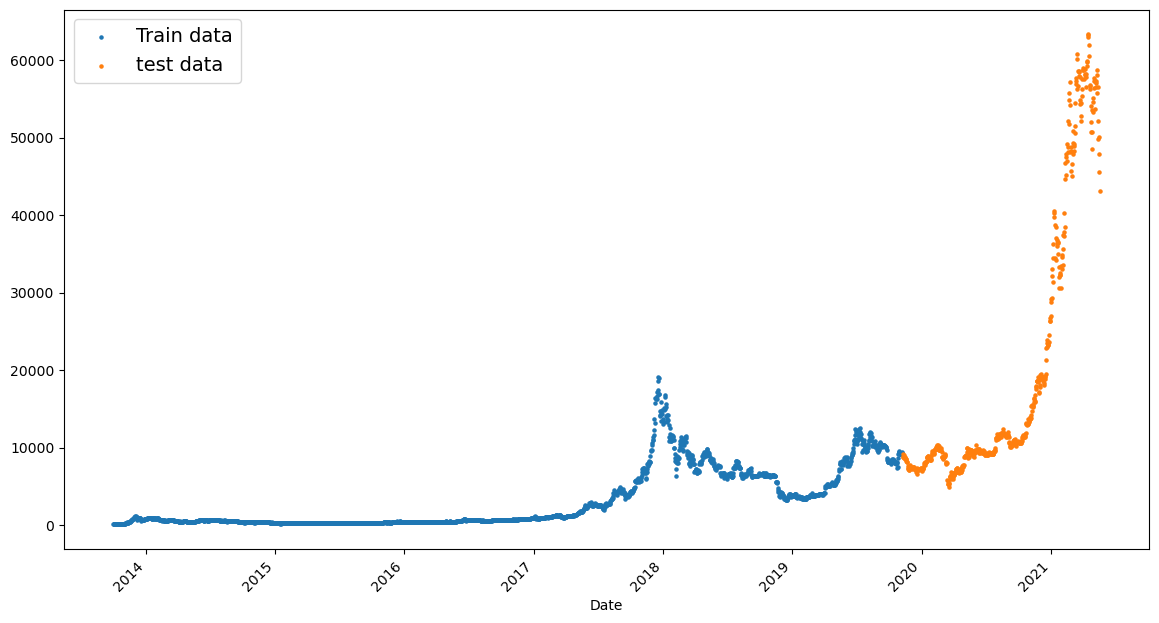

In [33]:
#plotting train test split
plt.figure(figsize = (14, 7))
plt.scatter(x_train, y_train, s = 5, label = "Train data")
plt.scatter(x_test, y_test, s = 5, label = "test data")
plt.xlabel("Date")
plt.xticks(rotation=45, ha="right")
plt.legend(fontsize = 14)
plt.show()

In [34]:
#create a function to plot time series data
def plot_time_series(timesteps, values, fomrat = ".", start = 0, end = None, label = None):
  """
  plots timesteps (a seires of points in time) against values (a series of valuesacross timesteps)

  Parameters
  -----------
  timesteps : array of timestep values
  value : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timestep)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values
  """

  #Plot the series
  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  plt.legend(fontsize = 14)
  plt.grid(True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


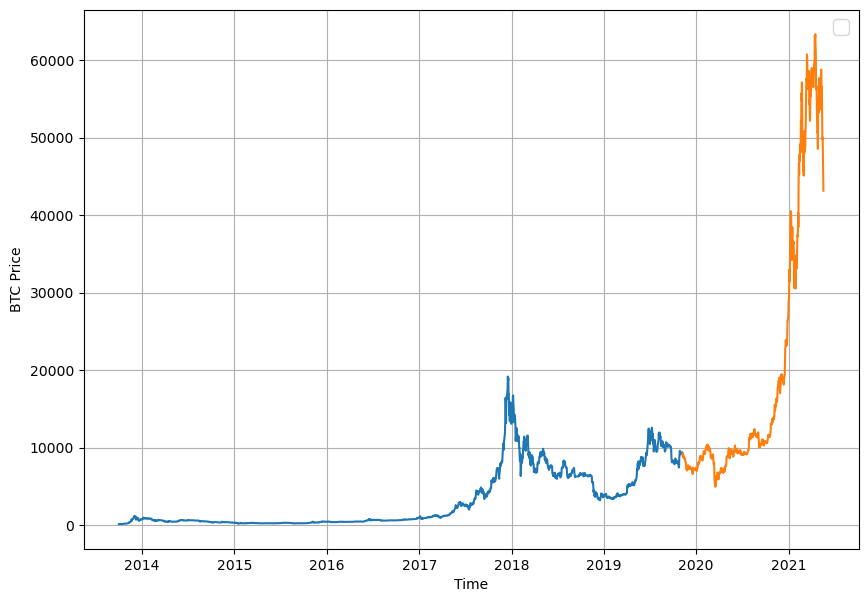

In [35]:
#Test our plotting function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = x_train,
                 values = y_train,
                 label = "train data")

plot_time_series(timesteps = x_test,
                 values = y_test,
                 label = "test data")

### Model Building

#### Naive forecast

In [36]:
#create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.485821, 8794.358645, 8798.042055, 9081.186878, 8711.534339,
        8760.892718, 8749.520591, 8656.970922, 8500.643558, 8469.260899]),
 array([57107.12067, 58788.20968, 58102.19143, 55715.54665, 56573.55547,
        52147.82119, 49764.13208, 50032.69314, 47885.62525, 45604.61575]))

In [37]:
y_test[-10:]

array([58788.20968, 58102.19143, 55715.54665, 56573.55547, 52147.82119,
       49764.13208, 50032.69314, 47885.62525, 45604.61575, 43144.47129])

In [38]:
len(naive_forecast)

557

In [39]:
len(y_test)

558

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


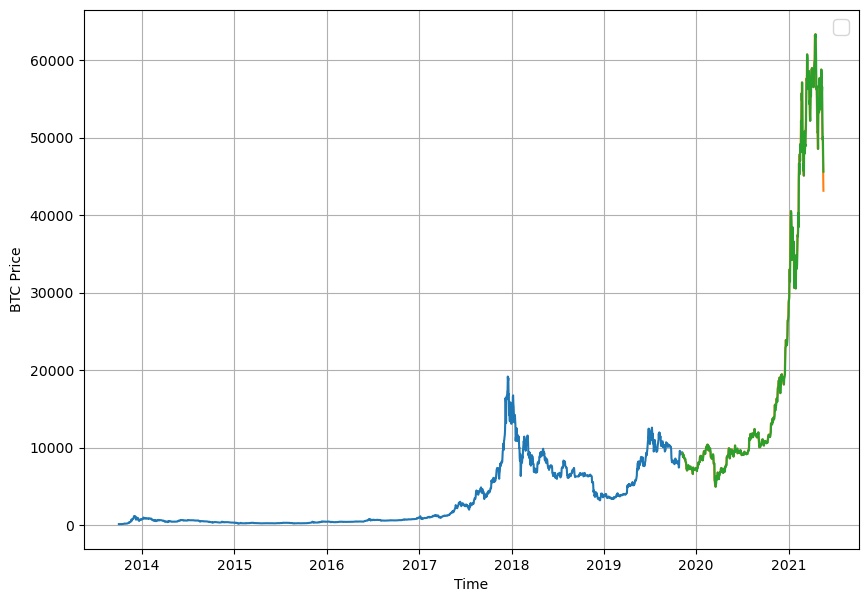

In [40]:
#plot naive forecast
plt.figure(figsize = (10, 7))
plt.legend()
plot_time_series(timesteps = x_train, values = y_train, label = "Train_data")
plot_time_series(timesteps = x_test, values = y_test, label = "Test_data")
plot_time_series(timesteps = x_test[1:], values = naive_forecast, fomrat=".", label = "Naive_Forecast")


#### Model Evaluation

In [42]:
import tensorflow as tf

In [43]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  #Implement MASE (assuming no seasonality of data)
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  #Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [44]:
mean_absolute_scaled_error(y_true = y_test[1:],
                           y_pred = naive_forecast).numpy()

0.9995699939172403

In [45]:
# create a function to take in model predictions and truth values and return evaluated results in a dictionary
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculation)\
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)


  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [46]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = y_test[:-1])

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#### Windowing our dataset

windowing our time series dataset to turn our data into supervised learning problem

windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]

In [47]:
#given
len(y_train)

2229

In [50]:
print(f"We want to use {prices[:7]}\nto predict {prices[7]}")

We want to use [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
to predict 123.033


In [51]:
# Let's setup global variables for window and horizon size
HORIZON = 1 #predict the next one day
WINDOW_SIZE = 7 #use  the past week data for this

In [52]:
# create function to label windowed data
def get_labelled_window(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset.
  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output:[0, 1, 2, 3, 4, 5, 6]  [7]
  """
  return x[:, :-horizon], x[:, -horizon]

In [53]:
z = tf.range(8)+1

In [54]:
z[:-1], z[-1]

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=8>)

In [55]:
tf.expand_dims(tf.range(8)+1, axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]])>

In [56]:
# test out the window lebelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis = 0))
test_window, test_label


(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([8])>)

We've got a way to label our windowed data.
However , this only works in a small scale.
We need to find a way to do this across the entire time series.
We could do this with python for loops, however fo rlarge timee series data that would be quite slow.
To speed things up, we'll leverage NUmpy's array indexing.

In [57]:
'''Creating a function which will:
1. Createa windowstep of specific window size(e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multpile window steps.
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
]2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2) to index on a target series(e.g. the historical price of bitocin).
4. Uses our `get_labelled_window()` function we created to turn the window steps into a windows with a specific horizon'''
import numpy as np

# create function to view NumPy arrays as windows
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_szie with horizon size labels.
  """
  #1. create a window of specific wondow size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  #2. create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T

  print(f"window indexes:\n {window_indexes, window_indexes.shape}")


  #3. index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #4. get labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)
  return windows, labels


In [58]:
np.expand_dims(np.arange(len(prices) - 7), axis = 0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [59]:
#get the windowed output

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [60]:
full_windows[1]

array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
       123.033  ])

In [61]:
full_labels[1]

124.049

#### Turning windows into training and test sets

In [62]:
# make the train test splits
def make_train_test_splits(windows, labels, test_splits = 0.2):
  """
  Splits mmatching pairs into training and testing splits
  """
  split_size = int(len(windows) * (1 - test_splits)) # this will default to 80% train/20% test splits
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [63]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [64]:
train_windows[:10], train_labels[:10]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966],
        [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
         125.9275 ],
        [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333],
        [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199],
        [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333],
        [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
         142.76333]]),
 array([123.033  , 124.049  , 125.9611

In [65]:
# check to see if train labels are the same (before and after window split)
np.array_equal (np.squeeze(train_labels[:-HORIZON -1]),y_train[WINDOW_SIZE:])

True

In [66]:
y_train

array([ 123.65499 ,  125.455   ,  108.58483 , ..., 9369.628081,
       9326.599624, 9335.752402])

In [67]:
np.squeeze(train_labels[:-HORIZON ])

array([ 123.033   ,  124.049   ,  125.96116 , ..., 9326.599624,
       9335.752402, 9226.485821])

In [69]:
#Creating a model check point
import os

#create a function to implement a MOdelCheckpoint callback with a specific filename.
def create_model_checkpoint(model_name,  save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            save_best_only = True)

#### Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

- A single dense layer with 128 units and ReLu activation.
- An output layer with linear activation(no activation)
- Adam optimisation and MAE loss function
- Batch size of 128 (previously we used 32, however our data is quite small, so we can upscale or batch size).
- we are going to run for 100 epochs.

In [70]:
import tensorflow as tf
from tensorflow.keras import layers

#set random seed
tf.random.set_seed(42)

#1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_1_dense")

#compile the model
model_1.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

#fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = 'model_1_dense')])


Epoch 1/100


 1/18 [>.............................] - ETA: 14s - loss: 2398.4292 - mae: 2398.4292 - mse: 12004078.0000INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 2s 43ms/step - loss: 870.3742 - mae: 870.3742 - mse: 2925347.7500 - val_loss: 2316.8086 - val_mae: 2316.8086 - val_mse: 14629882.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 375.4598 - mae: 375.4598 - mse: 768196.1250INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 34ms/step - loss: 282.0904 - mae: 282.0904 - mse: 383536.5312 - val_loss: 1322.7935 - val_mae: 1322.7935 - val_mse: 5832888.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 176.6388 - mae: 176.6388 - mse: 117217.1016INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 227.9577 - mae: 227.9577 - mse: 264798.1562 - val_loss: 1245.2708 - val_mae: 1245.2708 - val_mse: 4956352.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 281.4723 - mae: 281.4723 - mse: 383153.2500INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 213.5288 - mae: 213.5288 - mse: 239866.0781 - val_loss: 1234.8910 - val_mae: 1234.8910 - val_mse: 4673809.5000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 208.2438 - mae: 208.2438 - mse: 163970.5938INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 208.3350 - mae: 208.3350 - mse: 226700.8438 - val_loss: 1071.4055 - val_mae: 1071.4055 - val_mse: 3825538.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.1179 - mae: 145.1179 - mse: 70947.6172INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 193.9283 - mae: 193.9283 - mse: 191918.5156 - val_loss: 1038.1565 - val_mae: 1038.1565 - val_mse: 3408175.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 223.7818 - mae: 223.7818 - mse: 364216.2188INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 179.8982 - mae: 179.8982 - mse: 170931.5469 - val_loss: 963.9399 - val_mae: 963.9399 - val_mse: 3125073.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6991 - mae: 146.6991 - mse: 83631.8125INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 170.3227 - mae: 170.3227 - mse: 155866.9062 - val_loss: 927.0330 - val_mae: 927.0330 - val_mse: 2893854.2500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 141.8502 - mae: 141.8502 - mse: 95449.9062INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 166.2726 - mae: 166.2726 - mse: 147715.4531 - val_loss: 890.3323 - val_mae: 890.3323 - val_mse: 2651962.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 167.3315 - mae: 167.3315 - mse: 206109.2969INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 158.3215 - mae: 158.3215 - mse: 138549.7812 - val_loss: 857.4714 - val_mae: 857.4714 - val_mse: 2445864.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 156.8774 - mae: 156.8774 - mse: 112202.7344INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 151.0687 - mae: 151.0687 - mse: 127588.5938 - val_loss: 834.2777 - val_mae: 834.2777 - val_mse: 2263950.7500
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 145.5745 - mae: 145.5745 - mse: 119222.6172 - val_loss: 861.3926 - val_mae: 861.3926 - val_mse: 2260577.2500
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 147.8914 - mae: 147.8914 - mse: 118160.5547 - val_loss: 850.1758 - val_mae: 850.1758 - val_mse: 2186159.2500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 141.0601 - mae: 141.0601 - mse: 84568.9844INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 143.0098 - mae: 143.0098 - mse: 113654.4688 - val_loss: 783.7766 - val_mae: 783.7766 - val_mse: 1955058.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 141.4410 - mae: 141.4410 - mse: 77800.3984INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 145.6167 - mae: 145.6167 - mse: 110967.7109 - val_loss: 755.6024 - val_mae: 755.6024 - val_mse: 1905262.3750
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 134.4288 - mae: 134.4288 - mse: 102696.2266 - val_loss: 761.8643 - val_mae: 761.8643 - val_mse: 1840961.8750
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 132.0012 - mae: 132.0012 - mse: 100990.3750 - val_loss: 756.6969 - val_mae: 756.6969 - val_mse: 1804836.6250
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 151.2520 - mae: 151.2520 - mse: 133100.1094INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 130.8709 - mae: 130.8709 - mse: 98585.5234 - val_loss: 721.1127 - val_mae: 721.1128 - val_mse: 1756330.8750
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 130.1278 - mae: 130.1278 - mse: 97499.6953 - val_loss: 742.7892 - val_mae: 742.7892 - val_mse: 1733566.0000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0016 - mae: 138.0016 - mse: 110387.6406INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 126.3187 - mae: 126.3187 - mse: 92861.6406 - val_loss: 697.2490 - val_mae: 697.2490 - val_mse: 1637926.8750
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 128.8876 - mae: 128.8876 - mse: 94147.1875 - val_loss: 697.8591 - val_mae: 697.8591 - val_mse: 1661134.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 178.7837 - mae: 178.7837 - mse: 179763.3594INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 128.1342 - mae: 128.1342 - mse: 94403.4688 - val_loss: 694.7797 - val_mae: 694.7797 - val_mse: 1580576.0000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 120.6472 - mae: 120.6472 - mse: 67584.1016INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 127.7351 - mae: 127.7351 - mse: 91064.9688 - val_loss: 673.3433 - val_mae: 673.3433 - val_mse: 1536371.2500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 131.2295 - mae: 131.2295 - mse: 87715.1172INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 126.1782 - mae: 126.1782 - mse: 92683.6094 - val_loss: 668.7636 - val_mae: 668.7636 - val_mse: 1512410.7500
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 121.6836 - mae: 121.6836 - mse: 87319.6562 - val_loss: 674.0123 - val_mae: 674.0123 - val_mse: 1558405.7500
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 124.2998 - mae: 124.2998 - mse: 89095.4766 - val_loss: 684.8242 - val_mae: 684.8242 - val_mse: 1523537.7500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 164.4047 - mae: 164.4047 - mse: 123587.3672INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 127.2117 - mae: 127.2117 - mse: 86585.8750 - val_loss: 654.3002 - val_mae: 654.3002 - val_mse: 1454636.3750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8543 - mae: 109.8543 - mse: 72049.8047INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 118.6826 - mae: 118.6826 - mse: 83832.8906 - val_loss: 646.8069 - val_mae: 646.8069 - val_mse: 1438355.5000
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 110.6547 - mae: 110.6547 - mse: 77751.2500INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 121.2791 - mae: 121.2791 - mse: 84522.4609 - val_loss: 644.0419 - val_mae: 644.0419 - val_mse: 1429070.3750
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 140.9516 - mae: 140.9516 - mse: 116021.0312INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 120.9675 - mae: 120.9675 - mse: 83019.4297 - val_loss: 638.4852 - val_mae: 638.4852 - val_mse: 1405828.8750
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 124.0068 - mae: 124.0068 - mse: 83564.8750 - val_loss: 701.2334 - val_mae: 701.2334 - val_mse: 1527347.8750
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 120.6059 - mae: 120.6059 - mse: 84036.8359 - val_loss: 638.5522 - val_mae: 638.5522 - val_mse: 1383413.5000
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 115.4512 - mae: 115.4512 - mse: 78348.5234 - val_loss: 655.1821 - val_mae: 655.1821 - val_mse: 1413562.2500
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 147.7553 - mae: 147.7553 - mse: 152194.9531INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 115.1290 - mae: 115.1290 - mse: 79497.5938 - val_loss: 624.1537 - val_mae: 624.1537 - val_mse: 1357218.1250
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7718 - mae: 113.7718 - mse: 78409.5703 - val_loss: 642.0435 - val_mae: 642.0435 - val_mse: 1420858.3750
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 160.1919 - mae: 160.1919 - mse: 167042.1406INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 115.1818 - mae: 115.1818 - mse: 78776.6016 - val_loss: 619.5904 - val_mae: 619.5904 - val_mse: 1344408.6250
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1236 - mae: 135.1236 - mse: 120117.6562INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 113.3991 - mae: 113.3991 - mse: 77772.8203 - val_loss: 610.5092 - val_mae: 610.5092 - val_mse: 1314722.5000
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5255 - mae: 113.5255 - mse: 77065.2266 - val_loss: 612.3876 - val_mae: 612.3876 - val_mse: 1308439.7500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 134.9229 - mae: 134.9229 - mse: 99492.9141INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 114.3392 - mae: 114.3392 - mse: 78337.0547 - val_loss: 604.8469 - val_mae: 604.8469 - val_mse: 1296067.6250
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 111.0288 - mae: 111.0288 - mse: 74642.2188 - val_loss: 607.6966 - val_mae: 607.6966 - val_mse: 1304469.5000
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1956 - mae: 112.1956 - mse: 75097.2734 - val_loss: 662.4866 - val_mae: 662.4866 - val_mse: 1458952.1250
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.4284 - mae: 115.4284 - mse: 77807.3828 - val_loss: 697.0961 - val_mae: 697.0961 - val_mse: 1482285.6250
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 117.7609 - mae: 117.7609 - mse: 75375.5078 - val_loss: 722.5194 - val_mae: 722.5194 - val_mse: 1628227.3750
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 84.8249 - mae: 84.8249 - mse: 22

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 116.4376 - mae: 116.4376 - mse: 75656.2734 - val_loss: 597.2930 - val_mae: 597.2930 - val_mse: 1265635.8750
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7845 - mae: 109.7845 - mse: 73161.4922 - val_loss: 606.7087 - val_mae: 606.7087 - val_mse: 1290388.5000
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7752 - mae: 113.7752 - mse: 73395.2188 - val_loss: 623.8365 - val_mae: 623.8365 - val_mse: 1309784.6250
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 113.6334 - mae: 113.6334 - mse: 75662.1172 - val_loss: 634.8040 - val_mae: 634.8040 - val_mse: 1330638.2500
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 107.8876 - mae: 107.8876 - mse: 63074.6016INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 109.9548 - mae: 109.9548 - mse: 73612.2500 - val_loss: 594.5784 - val_mae: 594.5784 - val_mse: 1250835.1250
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4670 - mae: 110.4670 - mse: 73350.2812 - val_loss: 622.2322 - val_mae: 622.2322 - val_mse: 1301297.5000
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7658 - mae: 115.7658 - mse: 76543.0781 - val_loss: 681.9279 - val_mae: 681.9279 - val_mse: 1487956.0000
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8430 - mae: 115.8430 - mse: 76508.9141 - val_loss: 597.6406 - val_mae: 597.6406 - val_mse: 1250745.8750
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 116.5008 - mae: 116.5008 - mse: 61977.3672INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 112.3222 - mae: 112.3222 - mse: 74570.3594 - val_loss: 588.3156 - val_mae: 588.3156 - val_mse: 1237787.0000
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9151 - mae: 111.9151 - mse: 73509.9531 - val_loss: 625.6180 - val_mae: 625.6180 - val_mse: 1304423.2500
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0439 - mae: 110.0439 - mse: 72218.8906 - val_loss: 596.4641 - val_mae: 596.4641 - val_mse: 1244797.6250
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 129.4275 - mae: 129.4275 - mse: 104838.4688INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 110.1103 - mae: 110.1103 - mse: 73459.8906 - val_loss: 584.9955 - val_mae: 584.9955 - val_mse: 1226803.2500
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7334 - mae: 108.7334 - mse: 71204.5312 - val_loss: 803.9003 - val_mae: 803.9003 - val_mse: 1859809.1250
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 118.7625 - mae: 118.7625 - mse: 79471.4219 - val_loss: 591.0575 - val_mae: 591.0575 - val_mse: 1232444.5000
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6488 - mae: 110.6488 - mse: 71923.7578 - val_loss: 593.9672 - val_mae: 593.9672 - val_mse: 1244243.0000
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 109.0361 - mae: 109.0361 - mse: 71520.0000 - val_loss: 646.4604 - val_mae: 646.4604 - val_mse: 1374678.2500
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 115.3158 - mae: 115.3158 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 110.5595 - mae: 110.5595 - mse: 73395.6172 - val_loss: 582.9456 - val_mae: 582.9456 - val_mse: 1217280.3750
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 107.2390 - mae: 107.2390 - mse: 69848.1484 - val_loss: 585.4083 - val_mae: 585.4083 - val_mse: 1218179.8750
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 86.6748 - mae: 86.6748 - mse: 63744.4492INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 37ms/step - loss: 108.1030 - mae: 108.1030 - mse: 70131.4531 - val_loss: 582.3035 - val_mae: 582.3035 - val_mse: 1214481.8750
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 106.6371 - mae: 106.6371 - mse: 69707.6250 - val_loss: 630.6866 - val_mae: 630.6866 - val_mse: 1306484.2500
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9789 - mae: 131.9789 - mse: 153032.3594INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 111.8455 - mae: 111.8455 - mse: 73215.6328 - val_loss: 579.4335 - val_mae: 579.4335 - val_mse: 1205021.5000
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 116.5168 - mae: 116.5168 - mse: 78868.7969INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 107.9104 - mae: 107.9104 - mse: 70985.2656 - val_loss: 579.3916 - val_mae: 579.3916 - val_mse: 1203759.3750
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9773 - mae: 107.9773 - mse: 69348.3281 - val_loss: 697.4529 - val_mae: 697.4529 - val_mse: 1507364.3750
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1930 - mae: 108.1930 - mse: 69722.4062 - val_loss: 615.7985 - val_mae: 615.7985 - val_mse: 1271702.1250
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6164 - mae: 111.6164 - mse: 70795.3125 - val_loss: 674.6818 - val_mae: 674.6818 - val_mse: 1403851.6250
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 116.9596 - mae: 116.9596 - mse: 73868.4062 - val_loss: 683.6044 - val_mae: 683.6044 - val_mse: 1466303.7500
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 111.3947 - mae: 111.3947 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 108.6790 - mae: 108.6790 - mse: 69956.5938 - val_loss: 576.5991 - val_mae: 576.5991 - val_mse: 1190745.7500
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 73.2336 - mae: 73.2336 - mse: 22144.6191INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 109.5846 - mae: 109.5846 - mse: 71203.4375 - val_loss: 574.0072 - val_mae: 574.0072 - val_mse: 1186003.7500
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7224 - mae: 108.7224 - mse: 70702.6797 - val_loss: 578.3291 - val_mae: 578.3291 - val_mse: 1198559.2500
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1926 - mae: 110.1926 - mse: 69508.9453 - val_loss: 612.2968 - val_mae: 612.2968 - val_mse: 1274078.0000
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 108.8695 - mae: 108.8695 - mse: 70263.5156 - val_loss: 590.9551 - val_mae: 590.9551 - val_mse: 1224663.7500
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5179 - mae: 111.5179 - mse: 72848.9219 - val_loss: 582.6269 - val_mae: 582.6269 - val_mse: 1198325.0000
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 106.3606 - mae: 106.3606 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 106.7413 - mae: 106.7413 - mse: 69370.2500 - val_loss: 573.6680 - val_mae: 573.6680 - val_mse: 1181594.5000
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 106.3953 - mae: 106.3953 - mse: 69540.2031 - val_loss: 597.2822 - val_mae: 597.2822 - val_mse: 1222547.1250
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 152.9803 - mae: 152.9803 - mse: 119447.9609INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 111.6798 - mae: 111.6798 - mse: 71464.6797 - val_loss: 569.9487 - val_mae: 569.9487 - val_mse: 1174594.0000
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9434 - mae: 109.9434 - mse: 68552.1094 - val_loss: 600.2028 - val_mae: 600.2028 - val_mse: 1227679.7500


In [71]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 600.2028 - mae: 600.2028 - mse: 1227679.6250


[600.2028198242188, 600.2028198242188, 1227679.625]

In [73]:
#load in the saved best performing model
model_1 = tf.keras.models.load_model("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\model_experiments\\model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.9487 - mae: 569.9487 - mse: 1174594.0000


[569.9486694335938, 569.9486694335938, 1174594.0]

In [74]:
#Making forecasts with a model (on the test dataset)
def make_preds(model, input_data):
  """
  Uses model to ake predictions on input data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # reutrn 1D array of predictions.

In [75]:
#make predictions using model_1.
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[-10:]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([57409.39 , 58304.117, 58554.824, 56200.555, 56235.42 , 52865.08 ,
        50119.375, 49639.586, 48568.887, 45927.312], dtype=float32)>)

In [76]:
test_labels[-10:], test_labels.shape

(array([58788.20968, 58102.19143, 55715.54665, 56573.55547, 52147.82119,
        49764.13208, 50032.69314, 47885.62525, 45604.61575, 43144.47129]),
 (556,))

In [77]:
#evaluate pred
model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)
model_1_results

{'mae': 569.9487,
 'mse': 1174593.9,
 'rmse': 1083.7869,
 'mape': 2.5478973,
 'mase': 1.001242}

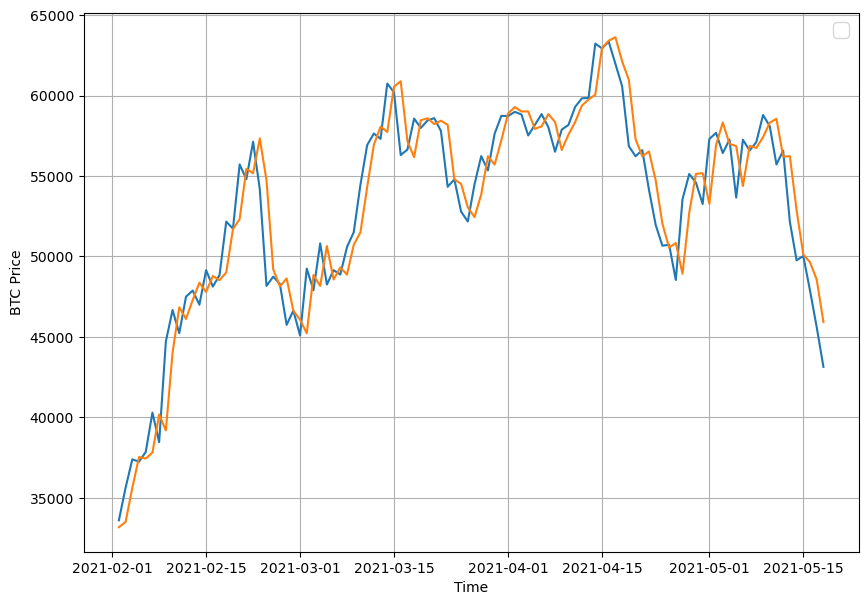

In [78]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize = (10, 7))
#Account for the test_window offset and index into test labels to ensure correct plot
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 label = "model_1_predictions")